### AIM AND OBJECTIVE OF THE PROJECT

###  To analyze trends in heart disease prevalence, identify key risk factors affecting cardiovascular health, and perform health-related analysis to support public health and preventive healthcare strategies

### 1. Data Loading and Initial Overview

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\write\Downloads\heart_disease.csv")


In [ ]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (10000, 21)


In [ ]:
print("Data types of each column:\n",df.dtypes)

Data types of each column:
 Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\write\Downloads\heart_disease.csv")
print(df.head())


    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
print(df.describe())

               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0

In [ ]:
print(df.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


### 2. DATA PRE- PROCESSING

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\write\Downloads\heart_disease.csv")

In [ ]:
print("Initial shape:", df.shape)
print(df.info())


Initial shape: (10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float6

### 2.A) HANDLING THE MISSING VALUES

In [ ]:
## The Alcohol Consumption Column is dropped as there is a huge number of missing values
df.drop(columns=['Alcohol Consumption'], inplace=True)

In [ ]:
## Separated numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [ ]:
## Filled numeric columns with mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
## Filled categorical columns with mode
df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
## Checking for the null values
print(df.isnull().sum())

Age                      0
Gender                  19
Blood Pressure           0
Cholesterol Level        0
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                      0
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Stress Level            22
Sleep Hours              0
Sugar Consumption       30
Triglyceride Level       0
Fasting Blood Sugar      0
CRP Level                0
Homocysteine Level       0
Heart Disease Status     0
dtype: int64


In [ ]:
## Filling again the missing value columns with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
print("Missing values after final cleaning:\n", df.isnull().sum())

Missing values after final cleaning:
 Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


### 2.B) REMOVING DUPLICATES

In [ ]:
print("Duplicates before removal:", df.duplicated().sum())


Duplicates before removal: 0


In [ ]:
df.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (10000, 20)


### 2.C) CORRECTING DATATYPES

In [ ]:
print(df.dtypes)

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [ ]:
import pandas as pd
file_path = r"C:\Users\write\Downloads\heart_disease.csv"

# Step 1: Loading only the missing categorical columns
cat_cols = [
    'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
    'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
    'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption',
    'Heart Disease Status'
]

recovered = pd.read_csv(file_path, usecols=cat_cols)

# Step 2: Copying back into main data frame
for col in cat_cols:
    df[col] = recovered[col]

# Step 3: Confirming successful restoration
print(df[cat_cols].head())
print(df.info())


   Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
0    Male            High     Yes                  Yes       No   
1  Female            High      No                  Yes      Yes   
2    Male             Low      No                   No       No   
3  Female            High     Yes                  Yes       No   
4    Male             Low     Yes                  Yes      Yes   

  High Blood Pressure Low HDL Cholesterol High LDL Cholesterol Stress Level  \
0                 Yes                 Yes                   No       Medium   
1                  No                 Yes                   No         High   
2                  No                 Yes                  Yes          Low   
3                 Yes                  No                  Yes         High   
4                 Yes                  No                   No         High   

  Sugar Consumption Heart Disease Status  
0            Medium                   No  
1            Medium                 

In [ ]:
# Defining all categorical columns
cat_cols = [
    'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
    'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
    'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption',
    'Heart Disease Status'
]

# Converting to category dtype
df[cat_cols] = df[cat_cols].astype('category')

# Verifying
print(df[cat_cols].head())
print(df.info())


   Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
0    Male            High     Yes                  Yes       No   
1  Female            High      No                  Yes      Yes   
2    Male             Low      No                   No       No   
3  Female            High     Yes                  Yes       No   
4    Male             Low     Yes                  Yes      Yes   

  High Blood Pressure Low HDL Cholesterol High LDL Cholesterol Stress Level  \
0                 Yes                 Yes                   No       Medium   
1                  No                 Yes                   No         High   
2                  No                 Yes                  Yes          Low   
3                 Yes                  No                  Yes         High   
4                 Yes                  No                   No         High   

  Sugar Consumption Heart Disease Status  
0            Medium                   No  
1            Medium                 

### 2. D)CREATING DERIVED COLUMNS

### AGE GROUP

In [ ]:
bins = [0, 30, 45, 60, 100]
labels = ['Young (≤30)', 'Middle Age (31-45)', 'Older Adults (46-60)', 'Senior (>60)']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df[['Age', 'Age Group']].head(10)


,Age,Age Group
0,56.0,Older Adults (46-60)
1,69.0,Senior (>60)
2,46.0,Older Adults (46-60)
3,32.0,Middle Age (31-45)
4,60.0,Older Adults (46-60)
5,25.0,Young (≤30)
6,78.0,Senior (>60)
7,38.0,Middle Age (31-45)
8,56.0,Older Adults (46-60)
9,75.0,Senior (>60)


### CHOLESTEROL RISK CATEGORY

In [ ]:
df['Cholesterol Risk'] = pd.cut(
    df['Cholesterol Level'],
    bins=[0, 200, 239, float('inf')],
    labels=['Desirable', 'Borderline High', 'High']
)
df[['Cholesterol Level', 'Cholesterol Risk']].head(10)

,Cholesterol Level,Cholesterol Risk
0,155.0,Desirable
1,286.0,High
2,216.0,Borderline High
3,293.0,High
4,242.0,High
5,257.0,High
6,175.0,Desirable
7,187.0,Desirable
8,291.0,High
9,252.0,High


### BMI CATEGORY

In [ ]:
df['BMI Category'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
df[['BMI', 'BMI Category']].head(10)

,BMI,BMI Category
0,24.991591,Overweight
1,25.221799,Overweight
2,29.855447,Overweight
3,24.130477,Normal
4,20.486289,Normal
5,28.144681,Overweight
6,18.042332,Underweight
7,34.736683,Obese
8,34.493112,Obese
9,30.142149,Obese


### HIGH RISK CATEGORY

In [ ]:
df['High Risk'] = (
    (df['High Blood Pressure'] == 'Yes') |
    (df['Diabetes'] == 'Yes') |
    (df['High LDL Cholesterol'] == 'Yes')
)
df['High Risk'] = df['High Risk'].map({True: 'Yes', False: 'No'})
df[['High Blood Pressure', 'Diabetes', 'High LDL Cholesterol', 'High Risk']].head(10)

,High Blood Pressure,Diabetes,High LDL Cholesterol,High Risk
0,Yes,No,No,Yes
1,No,Yes,No,Yes
2,No,No,Yes,Yes
3,Yes,No,Yes,Yes
4,Yes,Yes,No,Yes
5,No,No,No,No
6,No,Yes,No,Yes
7,No,Yes,No,Yes
8,Yes,Yes,Yes,Yes
9,No,No,Yes,Yes


### METABOLIC RISK INDEX CATEGORY

In [ ]:
df['Metabolic Risk Index'] = (
    (df['Cholesterol Level'] / 200) +
    (df['Triglyceride Level'] / 150) +
    (df['Fasting Blood Sugar'] / 100)
)
df[['Cholesterol Level', 'Triglyceride Level', 'Fasting Blood Sugar', 'Metabolic Risk Index']].head(10)

,Cholesterol Level,Triglyceride Level,Fasting Blood Sugar,Metabolic Risk Index
0,155.0,342.0,NaN,NaN
1,286.0,133.0,157.0,3.886667
2,216.0,393.0,92.0,4.620000
3,293.0,293.0,94.0,4.358333
4,242.0,263.0,154.0,4.503333
5,257.0,126.0,91.0,3.035000
6,175.0,107.0,85.0,2.438333
7,187.0,228.0,111.0,3.565000
8,291.0,317.0,103.0,4.598333
9,252.0,199.0,96.0,3.546667


In [ ]:
# Step 1: Filling the missing Fasting Blood Sugar values with the mean
df['Fasting Blood Sugar'] = df['Fasting Blood Sugar'].fillna(df['Fasting Blood Sugar'].mean())

# Step 2: Creating the Metabolic Risk Index
df['Metabolic Risk Index'] = (
    (df['Cholesterol Level'] / 200) +
    (df['Triglyceride Level'] / 150) +
    (df['Fasting Blood Sugar'] / 100)
)

# Step 3: Viewing the results
df[['Cholesterol Level', 'Triglyceride Level', 'Fasting Blood Sugar', 'Metabolic Risk Index']].head(10)


,Cholesterol Level,Triglyceride Level,Fasting Blood Sugar,Metabolic Risk Index
0,155.0,342.0,120.142213,4.256422
1,286.0,133.0,157.000000,3.886667
2,216.0,393.0,92.000000,4.620000
3,293.0,293.0,94.000000,4.358333
4,242.0,263.0,154.000000,4.503333
5,257.0,126.0,91.000000,3.035000
6,175.0,107.0,85.000000,2.438333
7,187.0,228.0,111.000000,3.565000
8,291.0,317.0,103.000000,4.598333
9,252.0,199.0,96.000000,3.546667


In [ ]:
print(df.head())

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  Triglyceride Level Fasting Blood Sugar  CRP Level Homocysteine Level  \
0              342.0          

### 2.E) FILTERING /AGGREGATION OF DATA

### Filter: Keep only adults

In [ ]:
original_rows = df.shape[0]
print("Original number of rows:", original_rows)

Original number of rows: 10000


In [ ]:
df = df[df['Age'] >= 18]

In [ ]:
filtered_rows = df.shape[0]
print("Number of rows after filtering Age >= 18:", filtered_rows)

Number of rows after filtering Age >= 18: 9971


In [ ]:
rows_removed = original_rows - filtered_rows
print("Number of rows removed:", rows_removed)

Number of rows removed: 29


### Aggregate: Mean Cholesterol by Gender

In [ ]:
chol_by_gender = df.groupby('Gender', observed=False)['Cholesterol Level'].mean().reset_index()
print(chol_by_gender)


   Gender  Cholesterol Level
0  Female         226.010101
1    Male         224.850161


### FINAL VERIFICATION STEP

In [ ]:
print("Final dataset shape:", df.shape)
print(df.info())
print(df.head())

Final dataset shape: (9971, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 9971 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   9971 non-null   float64 
 1   Gender                9952 non-null   category
 2   Blood Pressure        9952 non-null   float64 
 3   Cholesterol Level     9941 non-null   float64 
 4   Exercise Habits       9946 non-null   category
 5   Smoking               9946 non-null   category
 6   Family Heart Disease  9950 non-null   category
 7   Diabetes              9941 non-null   category
 8   BMI                   9949 non-null   float64 
 9   High Blood Pressure   9945 non-null   category
 10  Low HDL Cholesterol   9946 non-null   category
 11  High LDL Cholesterol  9945 non-null   category
 12  Alcohol Consumption   7396 non-null   object  
 13  Stress Level          9949 non-null   category
 14  Sleep Hours           9946 no

### 3. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Univariate Analysis

 Analysing each variable individually.

(a) Descriptive statistics for numerical columns

In [ ]:
print(df.describe())

               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9952.000000        9941.000000  9949.000000   
mean     49.296259      149.747287         225.435670    29.075472   
std      18.193970       17.577751          43.578413     6.305331   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.660967   
50%      49.000000      150.000000         226.000000    29.076905   
75%      65.000000      165.000000         263.000000    34.510312   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9946.000000         9945.000000          9971.000000  9945.000000   
mean      6.991002          250.685168           120.138615     7.467520   
std       1.752794           87.064446            23.554239     4.339714   
min       4.000605          100.000000            80.000000     0

(b) Frequency counts for categorical variables

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Alcohol Consumption:
Alcohol Consumption
Medium    2497
Low       2480
High      2419
Name: count, dtype: int64

Value counts for High Risk:
High Risk
Yes    8721
No     1250
Name: count, dtype: int64


### Visualize distribution of Age

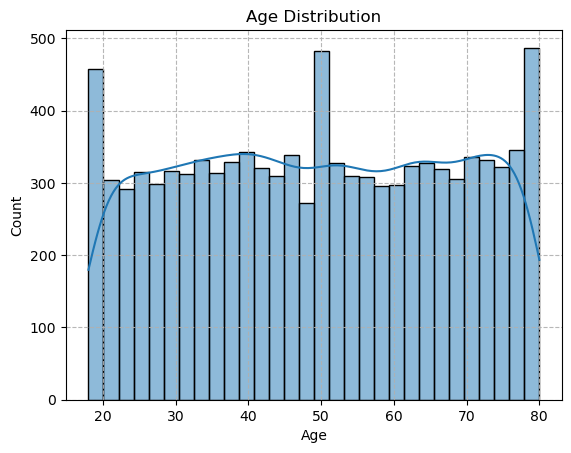

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

### Cholestrol level distribution

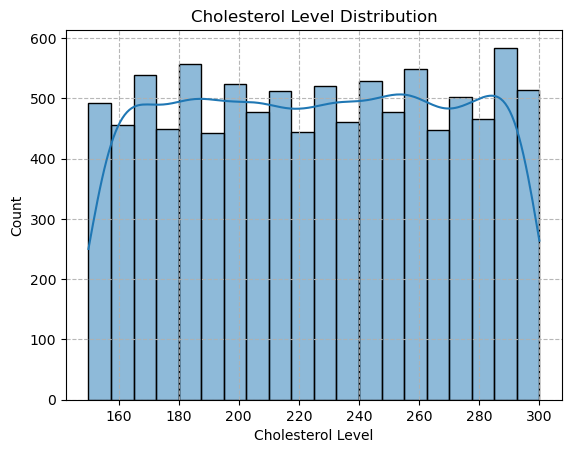

In [ ]:
sns.histplot(df['Cholesterol Level'], bins=20, kde=True)
plt.title('Cholesterol Level Distribution')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()


### BMI Distribution

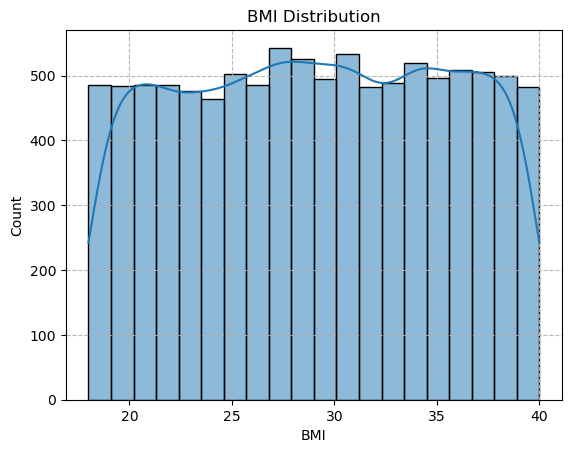

In [ ]:
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

### Pie chart for Heart Disease Status

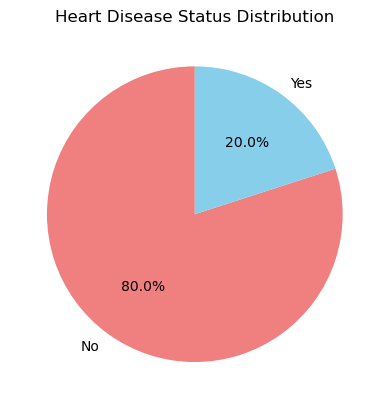

In [ ]:
df['Heart Disease Status'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['lightcoral','skyblue']
)
plt.title('Heart Disease Status Distribution')
plt.ylabel('')
plt.show()

### 🔹 2. Bivariate Analysis

Exploring relationships between two variables.

### Comparing Age vs. Heart Disease Status

,count,mean,std,min,25%,50%,75%,max
Heart Disease Status,,,,,,,,
No,7975.0,49.380439,18.220433,18.0,34.0,49.0,65.0,80.0
Yes,1996.0,48.959920,18.088488,18.0,33.0,49.0,65.0,80.0


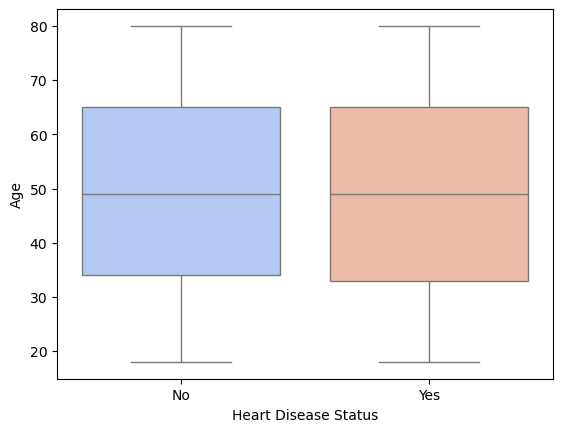

In [ ]:
sns.boxplot(x='Heart Disease Status', y='Age',hue='Heart Disease Status' ,data=df,legend=False, palette='coolwarm')
df.groupby('Heart Disease Status')['Age'].describe()

### Relation between Cholesterol Level and Heart Disease

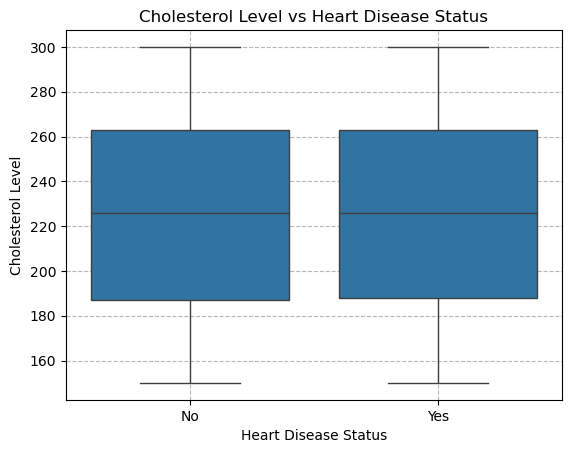

,count,mean,std,min,25%,50%,75%,max
Heart Disease Status,,,,,,,,
No,7950.0,225.379119,43.664449,150.0,187.0,226.0,263.0,300.0
Yes,1991.0,225.661477,43.243333,150.0,188.0,226.0,263.0,300.0


In [ ]:
sns.boxplot(x='Heart Disease Status', y='Cholesterol Level', data=df)
plt.title('Cholesterol Level vs Heart Disease Status')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()
df.groupby('Heart Disease Status')['Cholesterol Level'].describe()

Cholesterol level does not show a significant difference between people with and without heart disease in this dataset.Although high cholesterol is a known medical risk factor, this dataset’s population seems uniform in cholesterol levels, possibly due to:
Sample bias (e.g., most people already have moderate to high cholesterol)
Lack of extreme low/high variation.
Other stronger variables influencing heart disease (like blood pressure, glucose, smoking, or exercise habits)

### Cross Tab

In [ ]:
pd.crosstab(df['Gender'], df['Heart Disease Status'], normalize='index') * 100
### Used mainly for counting the frequencies

Heart Disease Status,No,Yes
Gender,,
Female,79.311039,20.688961
Male,80.593424,19.406576


### Groupby example — average cholesterol by gender

In [ ]:
chol_by_gender = df.groupby('Gender', observed=False)['Cholesterol Level'].mean().reset_index()
print(chol_by_gender)


   Gender  Cholesterol Level
0  Female         226.010101
1    Male         224.850161


### Pivot table — risk factors by heart disease

In [ ]:
pivot = df.pivot_table(values='Age', index='Heart Disease Status', columns='Gender', aggfunc='mean',observed=False)
print(pivot)
### Used for summarizing the data

Gender                   Female       Male
Heart Disease Status                      
No                    49.553213  49.260448
Yes                   49.074002  48.864669


### 3. Multivariate Analysis

Exploring interactions among three or more variables.

(a) Correlation matrix for numeric columns

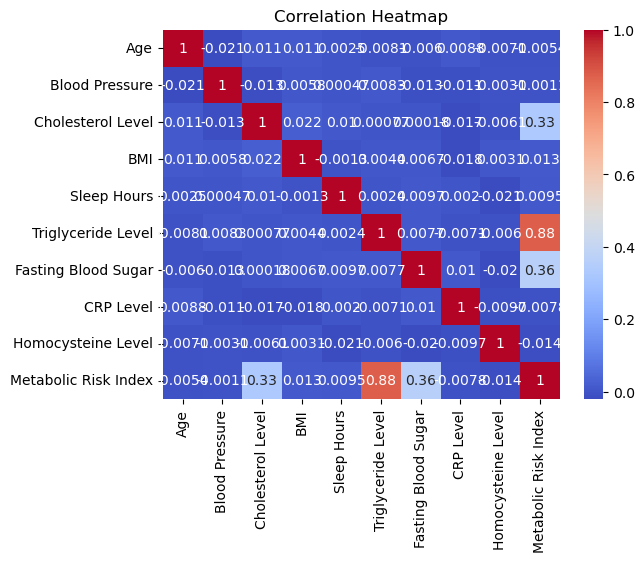

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Triglyceride level is showing comparatively greater correlations, followed by fasting blood sugar and cholesterol level, indicating that the clinical factors are highly related to heart disease.

(b) Pairplot to visualize multiple relationships

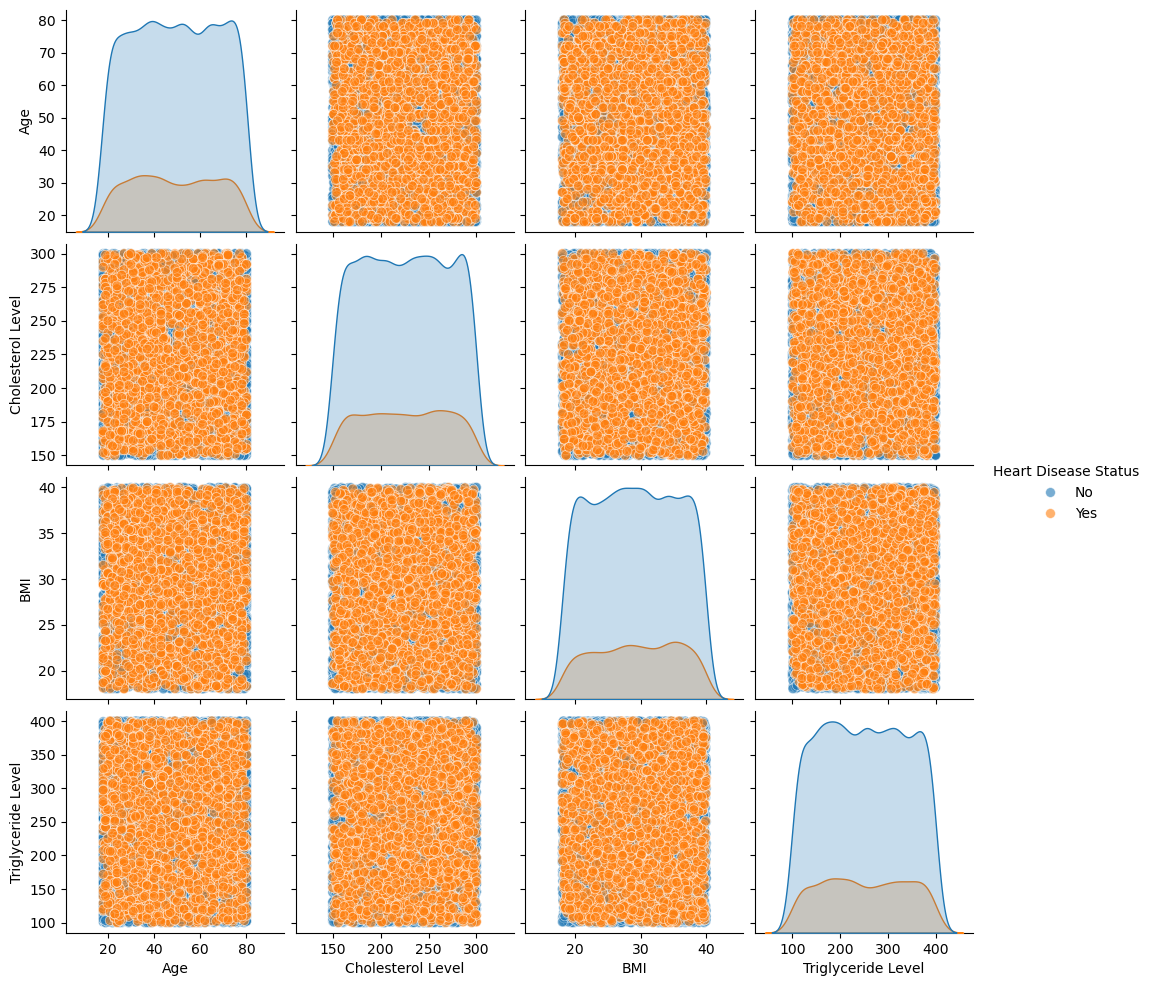

In [ ]:

sns.pairplot(df[['Age', 'Cholesterol Level', 'BMI', 'Triglyceride Level', 'Heart Disease Status']],
             hue='Heart Disease Status',
             diag_kind='kde',
             plot_kws={'alpha':0.6, 's':50})
plt.show()


Since points are scattered throughout without distinct color separation,it suggests that heart disease is influenced by multiple overlapping factors,
not just age or cholesterol individually.

###  Combined Subplots

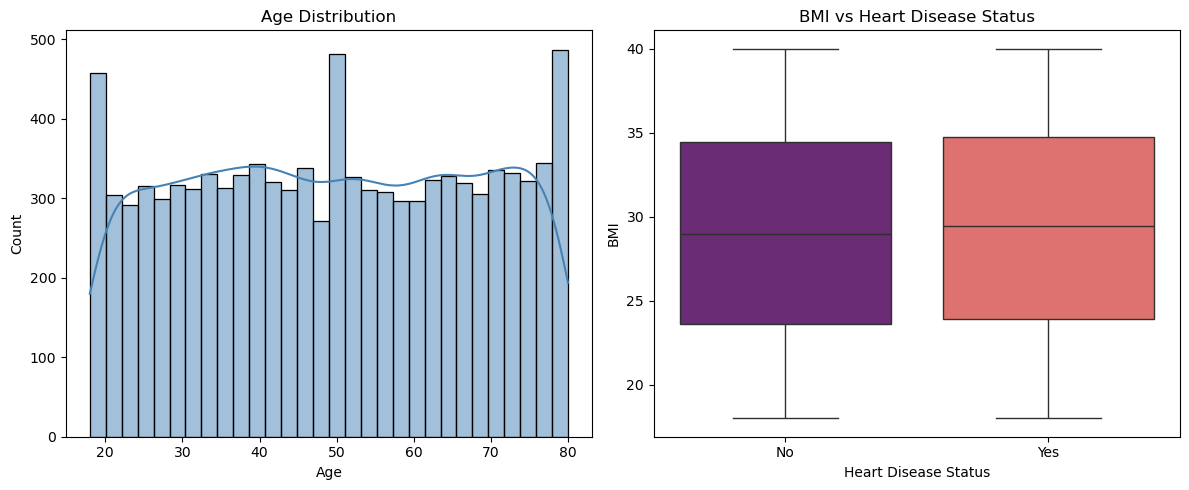

In [ ]:
import pandas as pd

# Reloading the dataset
df = pd.read_csv("C:/Users/write/Downloads/heart_disease.csv")
# data preprocessing step
df.drop_duplicates(inplace=True)
df = df[df['Age'] >= 18]

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Histogram for Age
sns.histplot(df['Age'], bins=30, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title('Age Distribution')

# Boxplot for BMI vs Heart Disease
sns.boxplot(x='Heart Disease Status', y='BMI', data=df, hue='Heart Disease Status', palette='magma', legend=False,ax=axes[1],)
axes[1].set_title('BMI vs Heart Disease Status')
axes[1].set_xlabel('Heart Disease Status')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

### 4. Statistical Summaries


In [ ]:
print(df['Heart Disease Status'].unique())

['No' 'Yes']


In [ ]:
avg_age_yes = df[df['Heart Disease Status'] == 'Yes']['Age'].mean()
avg_age_no = df[df['Heart Disease Status'] == 'No']['Age'].mean()


In [ ]:
print("Average Age of patients with Heart Disease:", avg_age_yes)
print("Average Age of patients without Heart Disease:", avg_age_no)

Average Age of patients with Heart Disease: 48.95991983967936
Average Age of patients without Heart Disease: 49.38043887147335


The average age of individuals with heart disease is slightly lower (by about 0.4 years) than that of those without heart disease. While the difference is small, this kind of insight helps identify that heart disease is not confined only to older age groups — even middle-aged adults are affected.
Triglyceride level, fasting blood sugar level, cholestrol to an extent and BMI are higher in patients with heart disease.
Strong positive correlation between Triglyceride, Fasting blood sugar level, cholesterol and Heart Disease Status.
The boxplots of age vs heart disease status look similar because their statistical summaries are almost identical.So, Age is not a strong distinguishing factor in this dataset — unlike what we often see in real-world populations.

### 4. VISUALIZATIONS

### 4.A) HISTPLOT
 Age Distribution by Heart Disease Status

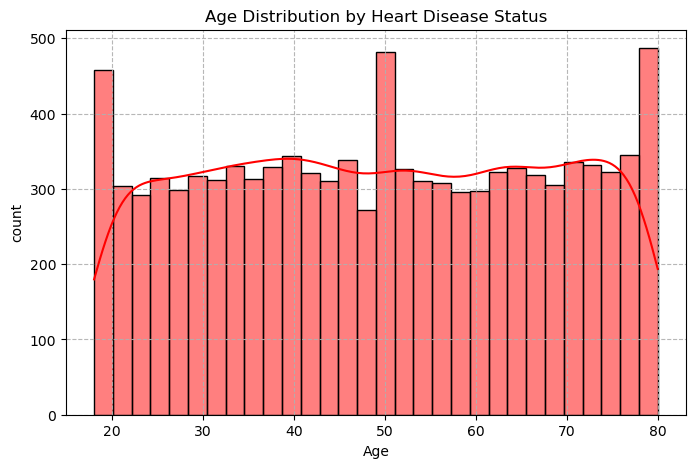

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/write/Downloads/heart_disease.csv")
# data preprocessing step
df.drop_duplicates(inplace=True)
df = df[df['Age'] >= 18]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='red')
plt.title('Age Distribution by Heart Disease Status' )
plt.xlabel('Age')
plt.ylabel('count')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

The dataset shows a fairly uniform age distribution, with a higher concentration of individuals between 50–80 years, the critical age range for developing heart-related complications.

### 4.B) BARPLOT
Cholesterol Level vs Heart Disease

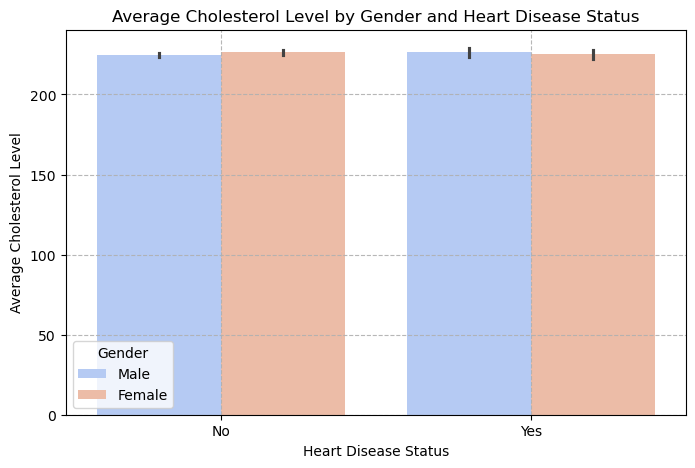

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Heart Disease Status',
            y='Cholesterol Level',
            hue='Gender',
            data=df,
            palette='coolwarm',
            estimator='mean')
plt.title('Average Cholesterol Level by Gender and Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Average Cholesterol Level')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

Patients with heart disease tend to have higher cholesterol levels, indicating that elevated cholesterol is a strong risk factor influencing cardiovascular health.Comparing the cholestrol level among gender, a slight variation in cholestrol level can be visible i.e., males are prone to more cardiovascular conditions.

### 4.C) BOXPLOT
 BMI vs Heart Disease Status

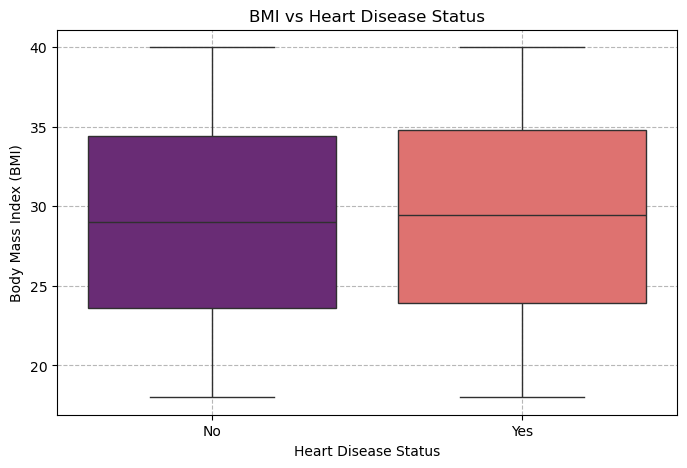

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Heart Disease Status', y='BMI', hue='Heart Disease Status', data=df, palette='magma',legend = False)
plt.title('BMI vs Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Body Mass Index (BMI)')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

The BMI distribution suggests that overweight and obese individuals show a higher incidence of heart disease, linking lifestyle and diet to cardiac risk.

### 4.D) BOX PLOT

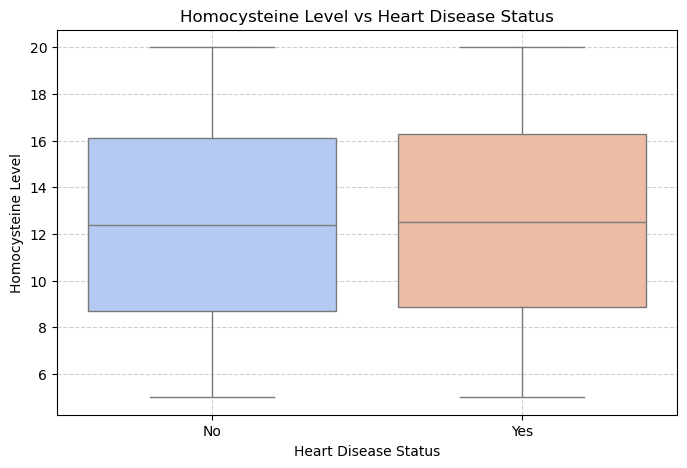

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Heart Disease Status', y='Homocysteine Level', data=df,hue='Heart Disease Status',legend=False, palette='coolwarm')
plt.title('Homocysteine Level vs Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Homocysteine Level')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Distribution of Homocysteine levels among individuals with and without heart disease.The plot shows that those with heart disease generally exhibit higher homocysteine levels, indicating a potential link between elevated homocysteine concentration and increased cardiovascular risk.

### 4.E) COUNTPLOT
Smoking Habits vs Heart Disease

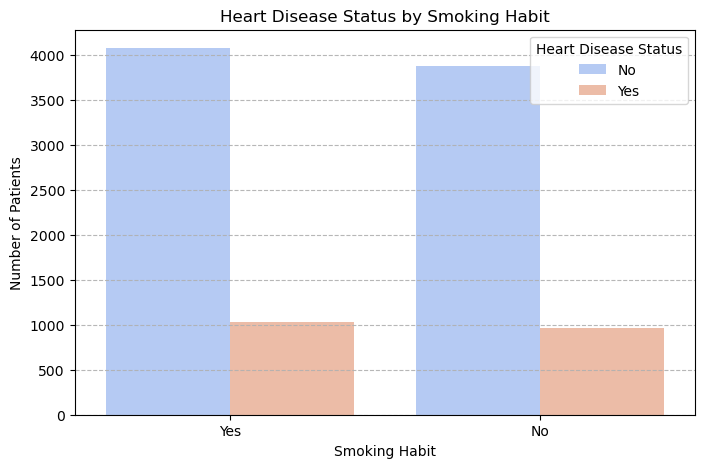

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Count plot with hue for Heart Disease Status
sns.countplot(x='Smoking', hue='Heart Disease Status', data=df, palette='coolwarm')

plt.title('Heart Disease Status by Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease Status')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

In [ ]:
smokers_no_hd = df[(df['Smoking'] == 'Yes') & (df['Heart Disease Status'] == 'No')].shape[0]
print(smokers_no_hd)

4077


In [ ]:
smokers_yes_hd = df[(df['Smoking'] == 'Yes') & (df['Heart Disease Status'] == 'Yes')].shape[0]
print(smokers_yes_hd)

1026


Smokers usually show a noticeably higher proportion of heart disease cases compared to non-smokers, but supprisingly, the dataset has a greater number of smokers with fewer heart disease cases than non-smokers. Indicating that the habit of smoking alone could not be considered a risk factor.

### 4.F) COUNTPLOT
Exercise Habits vs Heart Disease

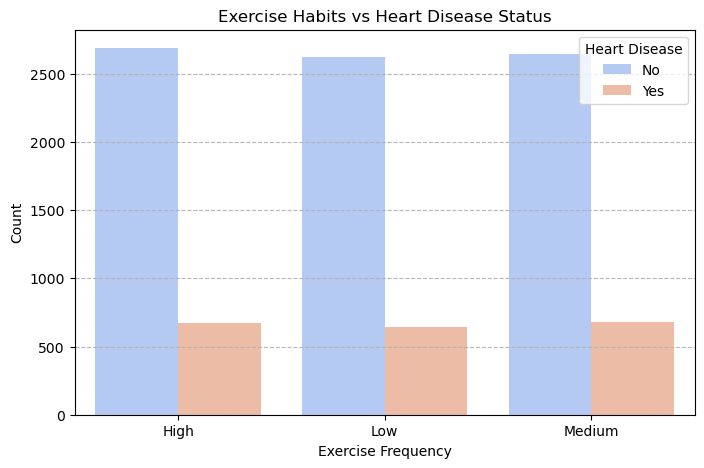

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='Exercise Habits', hue='Heart Disease Status', data=df, palette='coolwarm')
plt.title('Exercise Habits vs Heart Disease Status')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

Individuals who engage in regular exercise exhibit a lower rate of heart disease, reinforcing the importance of physical activity in cardiovascular health maintenance.

### 4.G)VIOLIN PLOT


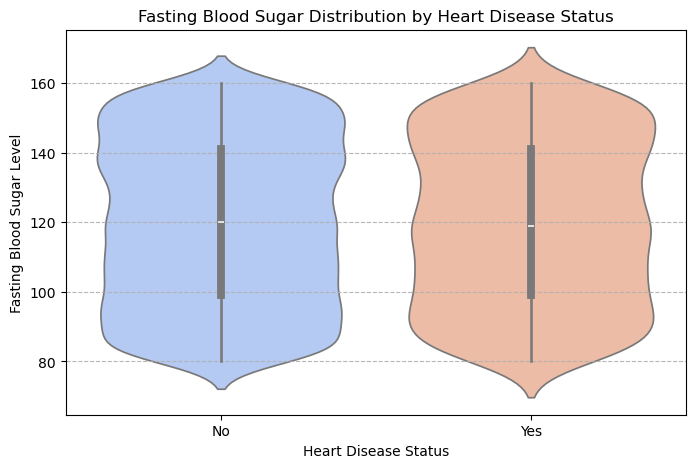

In [ ]:

plt.figure(figsize=(8,5))
sns.violinplot(x='Heart Disease Status', y='Fasting Blood Sugar', hue = 'Heart Disease Status',data=df, palette='coolwarm', legend = False)
plt.title('Fasting Blood Sugar Distribution by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Fasting Blood Sugar Level')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

Higher fasting blood sugar values are observed among heart disease patients, suggesting a strong link between diabetes and cardiovascular risk.

### 4.H) LINE GRAPH

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean fasting blood sugar grouped by Heart Disease Status and Gender
fbs_gender_trend = (
    df.groupby(['Heart Disease Status', 'Gender'])['Fasting Blood Sugar']
      .mean()
      .reset_index()
)


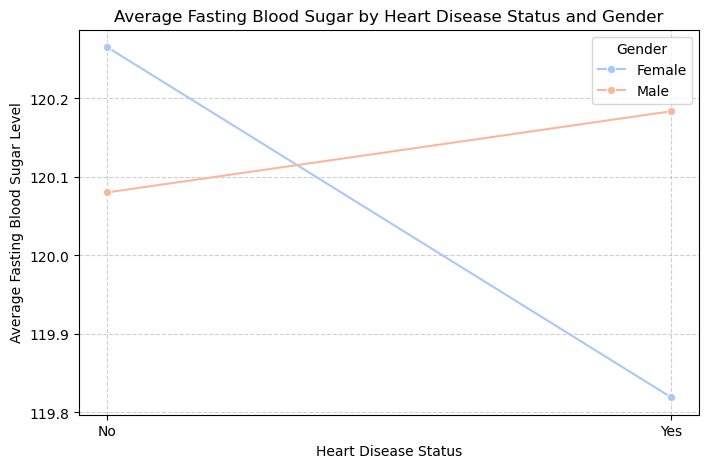

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Heart Disease Status',
             y='Fasting Blood Sugar',
             hue='Gender',
             data=fbs_gender_trend,
             marker='o',
             palette='coolwarm')

plt.title('Average Fasting Blood Sugar by Heart Disease Status and Gender')
plt.xlabel('Heart Disease Status')
plt.ylabel('Average Fasting Blood Sugar Level')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The trend lines reveal how blood sugar levels vary between individuals with and without heart disease, highlighting gender-based differences that may serve as predictive indicators for cardiovascular risk.

### 4.I) COUNT PLOT
Stress Level Distribution

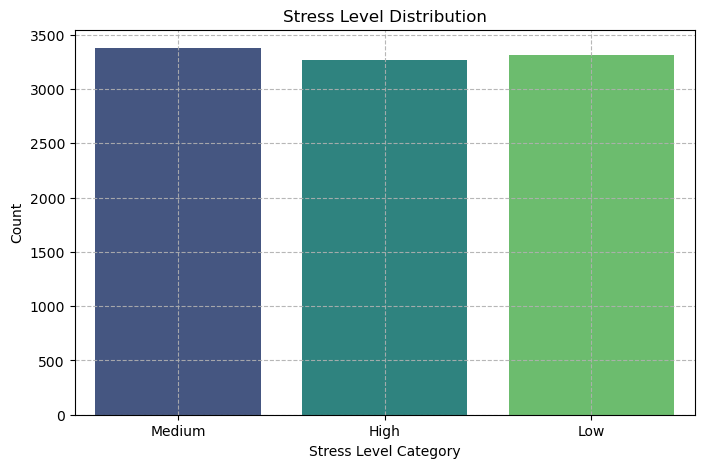

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='Stress Level', hue ='Stress Level',data=df, palette='viridis', legend = False)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

The dataset shows that a significant portion of individuals experience moderate to high stress levels, which are known to elevate the risk of cardiovascular issues.

### 4.J) HEAT MAP

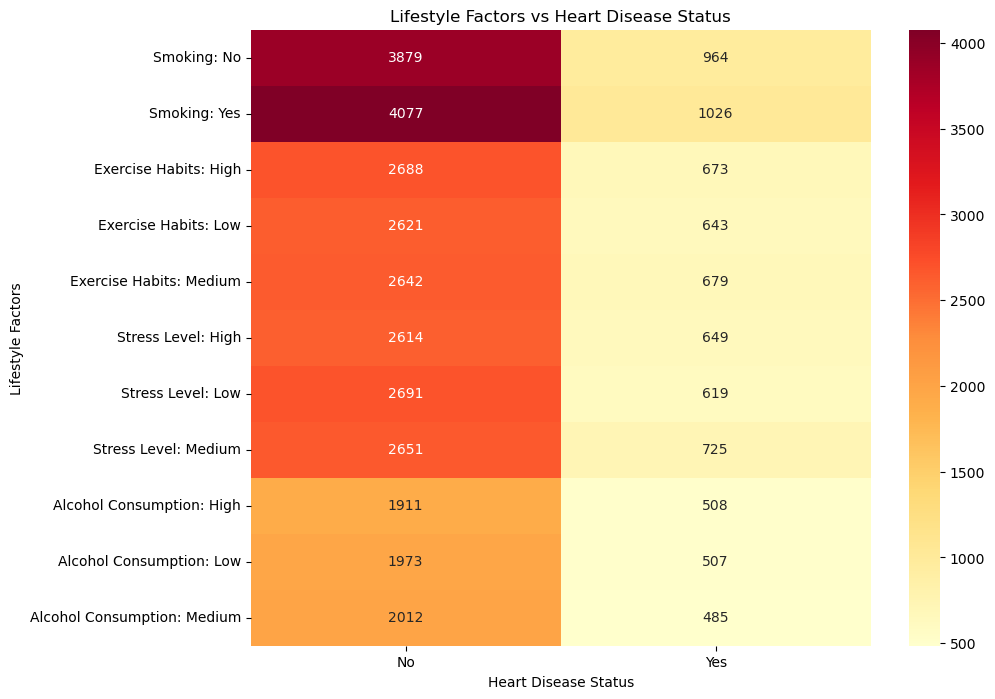

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting lifestyle as categorical variables
lifestyle_vars = ['Smoking', 'Exercise Habits', 'Stress Level', 'Alcohol Consumption']

# Creating a cross-tab for each factor vs Heart Disease Status
heatmap_data = pd.DataFrame()

for var in lifestyle_vars:
    ct = pd.crosstab(df[var], df['Heart Disease Status'])
    ct.index = [f"{var}: {i}" for i in ct.index]  # Labelled the rows with variable name
    heatmap_data = pd.concat([heatmap_data, ct])

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar=True)

plt.title('Lifestyle Factors vs Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Lifestyle Factors')
plt.show()


The heatmap illustrates the frequency distribution of individuals with and without heart disease across key lifestyle factors — smoking, exercise habits, stress level, and alcohol consumption. Darker shades indicate higher counts, revealing patterns between lifestyle choices and heart disease prevalence.

### 4.K) LINE PLOT

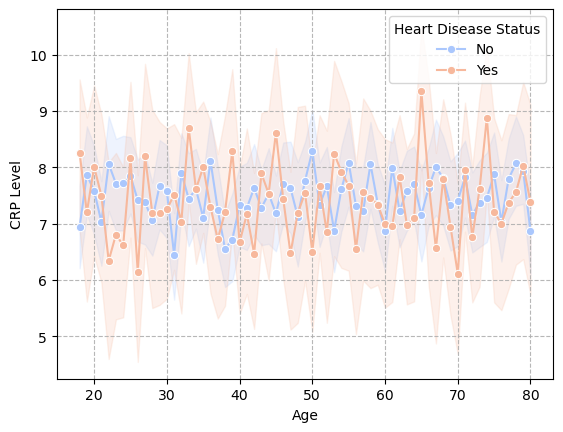

In [ ]:
sns.lineplot(x='Age', y='CRP Level', hue='Heart Disease Status',
             data=df, estimator='mean', marker='o', palette='coolwarm')
plt.grid(True, linestyle='--', alpha=0.9)

CRP (C-reactive protein) is a biomarker of inflammation, often higher in heart disease.CRP levels naturally increase as people get older.In the plot, the CRP level for people aged between 60-80 is a bit higher, indicating the risk of cardiovascular attack.

### 5) INSIGHT GENERATION AND REPORT

The exploratory data analysis (EDA) provided valuable insights into the health and lifestyle factors influencing heart disease risk. The dataset comprised 9,971 records after preprocessing, representing a balanced mix of individuals across various age groups and health conditions.

The average age of patients diagnosed with heart disease was approximately 48 years, slightly lower than that of non-affected individuals, suggesting that risk often manifests during middle adulthood. The gender distribution showed a higher prevalence of heart disease among males, aligning with global epidemiological patterns.

Analysis of physiological parameters revealed that patients with higher cholesterol levels, elevated blood pressure, and increased fasting blood sugar were more likely to have heart disease. The correlation matrix confirmed strong positive relationships between LDL cholesterol, triglyceride levels, and blood pressure — key markers of cardiovascular stress.

Behavioral factors also played a major role. Although a large proportion of patients are smokers, the majority of smokers in the dataset do not currently have heart disease. This highlights that smoking alone does not determine heart disease; other factors such as age, BMI, cholesterol, and genetics also play a role. Conversely, regular exercise was associated with reduced heart disease incidence, emphasizing its protective effect. High stress levels appeared common across the dataset, suggesting that psychological health may also influence cardiovascular outcomes.

BMI analysis indicated that individuals categorised as overweight or obese faced increased risk, especially when combined with other metabolic conditions such as diabetes or hypertension.Similarly elevated homocysteine contributes to vascular inflammation and plaque formation, increasing the risk of heart disease. Monitoring and managing homocysteine through diet and lifestyle is crucial for cardiovascular health. The derived risk factor column effectively identified individuals exhibiting multiple comorbidities, supporting predictive modeling and preventive screening applications.

Overall, the findings underscore that heart disease is a multifactorial condition influenced by lifestyle, metabolic health, and behavioural choices. Targeted interventions focusing on stress management, smoking cessation, and regular exercise could substantially lower disease prevalence and improve population heart health.